In [1]:
import tensorflow as tf 
import os
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from TssmNet import TssmNet, generate_input
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [2]:
gpus =tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")

Running on GPU


In [3]:
BATCH_SIZE = 16384
EPOCH = 50
ABC2 = os.path.join("..", "..", "ABC2", "ABC_ssm")
DATA_PATH = os.path.join(ABC2, "Train")
VALIDATION_PATH = os.path.join(ABC2, "Validation")
TEST_PATH = os.path.join(ABC2, "Test")
MODEL_PATH = os.path.join("Model", "TSSM")

In [4]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

In [5]:
model =  TssmNet(h=4, d_k=128, d_v=128, d_ff=128, d_model=datagen_train.get_input_shape()[2], n=1).build()

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 6)]           0         
                                                                 
 encoder (Encoder)           (None, 16, 6)             15524     
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 97        
                                                                 
Total params: 15,621
Trainable params: 15,621
Non-trainable params: 0
_________________________________________________________________


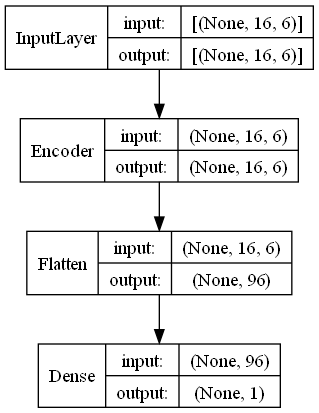

In [7]:
tf.keras.utils.plot_model(model, to_file=os.path.join("result","model_multi-head_attention.png"), show_layer_names=False,  show_shapes=True)

In [8]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

In [10]:
%%time
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=EPOCH,
         callbacks= [tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=int(EPOCH*2/10), min_lr=0.0000001)])

Epoch 1/50
235/235 [==============================] - 37s 151ms/step - loss: 0.3725 - accuracy: 0.8532 - precision: 0.1865 - recall: 0.0903 - val_loss: 0.2991 - val_accuracy: 0.9088 - val_precision: 0.0135 - val_recall: 5.1693e-05 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 35s 150ms/step - loss: 0.3048 - accuracy: 0.8889 - precision: 0.4731 - recall: 0.1125 - val_loss: 0.1800 - val_accuracy: 0.9378 - val_precision: 0.9072 - val_recall: 0.1556 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 35s 150ms/step - loss: 0.2895 - accuracy: 0.8928 - precision: 0.6414 - recall: 0.2607 - val_loss: 0.1688 - val_accuracy: 0.9364 - val_precision: 0.9604 - val_recall: 0.2654 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 35s 150ms/step - loss: 0.2500 - accuracy: 0.9069 - precision: 0.6838 - recall: 0.3414 - val_loss: 0.1389 - val_accuracy: 0.9536 - val_precision: 0.9255 - val_recall: 0.4237 - lr: 0.0010
Epoch 5/50
235/235 [================

<Figure size 1000x500 with 0 Axes>

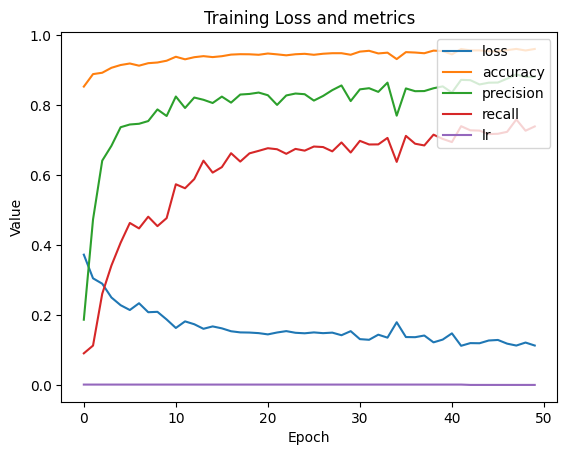

In [11]:
history_df = pd.DataFrame(hist.history)
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy', 'precision', 'recall', 'lr']].plot()
plt.title('Training Loss and metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.savefig(os.path.join("result", "model_multi-head_attention_plot.png"))
plt.show()


# Evaluate

In [12]:
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

In [13]:
%%time
e1 = Evaluation(model, datagen_test)
e1.predict()

Running on GPU


  0%|                                                                                           | 0/88 [00:00<?, ?it/s]

512/512 [==============================] - 1s 2ms/step


  1%|▉                                                                                  | 1/88 [00:01<02:11,  1.51s/it]

512/512 [==============================] - 1s 2ms/step


  2%|█▉                                                                                 | 2/88 [00:02<01:57,  1.37s/it]

512/512 [==============================] - 1s 2ms/step


  3%|██▊                                                                                | 3/88 [00:04<01:54,  1.34s/it]

512/512 [==============================] - 1s 2ms/step


  5%|███▊                                                                               | 4/88 [00:05<01:50,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


  6%|████▋                                                                              | 5/88 [00:06<01:47,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


  7%|█████▋                                                                             | 6/88 [00:07<01:47,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


  8%|██████▌                                                                            | 7/88 [00:09<01:45,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


  9%|███████▌                                                                           | 8/88 [00:10<01:45,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 10%|████████▍                                                                          | 9/88 [00:11<01:41,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 11%|█████████▎                                                                        | 10/88 [00:13<01:41,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 12%|██████████▎                                                                       | 11/88 [00:14<01:38,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 14%|███████████▏                                                                      | 12/88 [00:15<01:38,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 15%|████████████                                                                      | 13/88 [00:16<01:36,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 16%|█████████████                                                                     | 14/88 [00:18<01:36,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 17%|█████████████▉                                                                    | 15/88 [00:19<01:33,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 18%|██████████████▉                                                                   | 16/88 [00:20<01:34,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 19%|███████████████▊                                                                  | 17/88 [00:22<01:31,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 20%|████████████████▊                                                                 | 18/88 [00:23<01:31,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 22%|█████████████████▋                                                                | 19/88 [00:24<01:28,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 23%|██████████████████▋                                                               | 20/88 [00:26<01:28,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 24%|███████████████████▌                                                              | 21/88 [00:27<01:26,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 25%|████████████████████▌                                                             | 22/88 [00:28<01:26,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 26%|█████████████████████▍                                                            | 23/88 [00:29<01:23,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 27%|██████████████████████▎                                                           | 24/88 [00:31<01:23,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 28%|███████████████████████▎                                                          | 25/88 [00:32<01:20,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 30%|████████████████████████▏                                                         | 26/88 [00:33<01:20,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 31%|█████████████████████████▏                                                        | 27/88 [00:35<01:18,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 32%|██████████████████████████                                                        | 28/88 [00:36<01:18,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 33%|███████████████████████████                                                       | 29/88 [00:37<01:15,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 34%|███████████████████████████▉                                                      | 30/88 [00:39<01:15,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 35%|████████████████████████████▉                                                     | 31/88 [00:40<01:13,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 36%|█████████████████████████████▊                                                    | 32/88 [00:41<01:13,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 38%|██████████████████████████████▊                                                   | 33/88 [00:42<01:10,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 39%|███████████████████████████████▋                                                  | 34/88 [00:44<01:09,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 40%|████████████████████████████████▌                                                 | 35/88 [00:45<01:07,  1.27s/it]

512/512 [==============================] - 1s 2ms/step


 41%|█████████████████████████████████▌                                                | 36/88 [00:46<01:07,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 42%|██████████████████████████████████▍                                               | 37/88 [00:48<01:05,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 43%|███████████████████████████████████▍                                              | 38/88 [00:49<01:03,  1.27s/it]

512/512 [==============================] - 1s 2ms/step


 44%|████████████████████████████████████▎                                             | 39/88 [00:50<01:03,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 45%|█████████████████████████████████████▎                                            | 40/88 [00:51<01:01,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 47%|██████████████████████████████████████▏                                           | 41/88 [00:53<01:01,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 48%|███████████████████████████████████████▏                                          | 42/88 [00:54<01:00,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 49%|████████████████████████████████████████                                          | 43/88 [00:55<00:59,  1.33s/it]

512/512 [==============================] - 1s 2ms/step


 50%|█████████████████████████████████████████                                         | 44/88 [00:57<00:57,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 51%|█████████████████████████████████████████▉                                        | 45/88 [00:58<00:56,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 52%|██████████████████████████████████████████▊                                       | 46/88 [00:59<00:54,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 53%|███████████████████████████████████████████▊                                      | 47/88 [01:01<00:53,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 55%|████████████████████████████████████████████▋                                     | 48/88 [01:02<00:51,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 56%|█████████████████████████████████████████████▋                                    | 49/88 [01:03<00:52,  1.35s/it]

512/512 [==============================] - 1s 2ms/step


 57%|██████████████████████████████████████████████▌                                   | 50/88 [01:05<00:50,  1.33s/it]

512/512 [==============================] - 1s 2ms/step


 58%|███████████████████████████████████████████████▌                                  | 51/88 [01:06<00:48,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 59%|████████████████████████████████████████████████▍                                 | 52/88 [01:07<00:47,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 60%|█████████████████████████████████████████████████▍                                | 53/88 [01:09<00:46,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 61%|██████████████████████████████████████████████████▎                               | 54/88 [01:10<00:46,  1.35s/it]

512/512 [==============================] - 1s 2ms/step


 62%|███████████████████████████████████████████████████▎                              | 55/88 [01:11<00:44,  1.34s/it]

512/512 [==============================] - 1s 2ms/step


 64%|████████████████████████████████████████████████████▏                             | 56/88 [01:13<00:42,  1.33s/it]

512/512 [==============================] - 1s 2ms/step


 65%|█████████████████████████████████████████████████████                             | 57/88 [01:14<00:40,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 66%|██████████████████████████████████████████████████████                            | 58/88 [01:15<00:39,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 67%|██████████████████████████████████████████████████████▉                           | 59/88 [01:16<00:37,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 68%|███████████████████████████████████████████████████████▉                          | 60/88 [01:18<00:36,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 69%|████████████████████████████████████████████████████████▊                         | 61/88 [01:19<00:34,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 70%|█████████████████████████████████████████████████████████▊                        | 62/88 [01:20<00:33,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 72%|██████████████████████████████████████████████████████████▋                       | 63/88 [01:22<00:31,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 73%|███████████████████████████████████████████████████████████▋                      | 64/88 [01:23<00:31,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 74%|████████████████████████████████████████████████████████████▌                     | 65/88 [01:24<00:29,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 66/88 [01:26<00:28,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 76%|██████████████████████████████████████████████████████████████▍                   | 67/88 [01:27<00:26,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 77%|███████████████████████████████████████████████████████████████▎                  | 68/88 [01:28<00:26,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 78%|████████████████████████████████████████████████████████████████▎                 | 69/88 [01:29<00:24,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 80%|█████████████████████████████████████████████████████████████████▏                | 70/88 [01:31<00:23,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 81%|██████████████████████████████████████████████████████████████████▏               | 71/88 [01:32<00:21,  1.27s/it]

512/512 [==============================] - 1s 2ms/step


 82%|███████████████████████████████████████████████████████████████████               | 72/88 [01:33<00:20,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 83%|████████████████████████████████████████████████████████████████████              | 73/88 [01:35<00:19,  1.27s/it]

512/512 [==============================] - 1s 2ms/step


 84%|████████████████████████████████████████████████████████████████████▉             | 74/88 [01:36<00:18,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 85%|█████████████████████████████████████████████████████████████████████▉            | 75/88 [01:37<00:16,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 86%|██████████████████████████████████████████████████████████████████████▊           | 76/88 [01:38<00:15,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 88%|███████████████████████████████████████████████████████████████████████▊          | 77/88 [01:40<00:14,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 89%|████████████████████████████████████████████████████████████████████████▋         | 78/88 [01:41<00:13,  1.32s/it]

512/512 [==============================] - 1s 2ms/step


 90%|█████████████████████████████████████████████████████████████████████████▌        | 79/88 [01:42<00:11,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 91%|██████████████████████████████████████████████████████████████████████████▌       | 80/88 [01:44<00:10,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 92%|███████████████████████████████████████████████████████████████████████████▍      | 81/88 [01:45<00:08,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 93%|████████████████████████████████████████████████████████████████████████████▍     | 82/88 [01:46<00:07,  1.30s/it]

512/512 [==============================] - 1s 2ms/step


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 83/88 [01:47<00:06,  1.28s/it]

512/512 [==============================] - 1s 2ms/step


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 84/88 [01:49<00:05,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 85/88 [01:50<00:03,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 86/88 [01:51<00:02,  1.31s/it]

512/512 [==============================] - 1s 2ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████ | 87/88 [01:53<00:01,  1.29s/it]

512/512 [==============================] - 1s 2ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 88/88 [01:54<00:00,  1.30s/it]


CPU times: total: 2min 9s
Wall time: 1min 57s


In [14]:
e1.eval_()

,precision,recall,MCC,F1,accuracy,IoU
0,0.90196,0.796113,0.826557,0.845737,0.962481,0.732708


In [15]:
e1.eval_().to_json(os.path.join("result","metrique_Tssm.json"))

In [16]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: Model\TSSM\assets


INFO:tensorflow:Assets written to: Model\TSSM\assets
